In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
features = torch.load('../output/results/features.pth')
labels = torch.load('../output/results/cifar10_resnet50_pre_labels.pth')
logits = torch.load('../output/results/cifar10_resnet50_pre_logits.pth')
features.shape, labels.shape, logits.shape

(torch.Size([10000, 2048]), torch.Size([10000]), torch.Size([10000, 10]))

In [3]:
# get wrongly prediction index with the confidence larger than 0.95
wrong_index = torch.where((labels != logits.argmax(dim=1)) & (F.softmax(logits, dim=1).max(dim=1).values > 0.95))[0]
# get correct prediction index with the confidence larger than 0.95
correct_index = torch.where((labels == logits.argmax(dim=1)) & (F.softmax(logits, dim=1).max(dim=1).values > 0.95))[0]

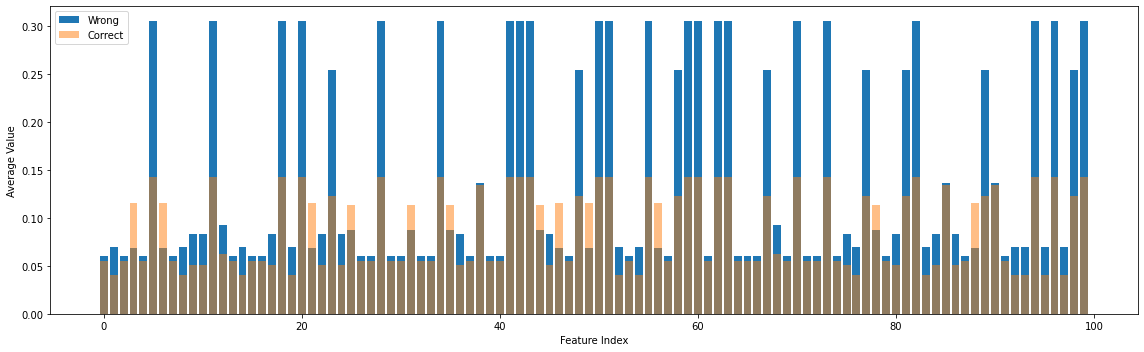

In [23]:
# randomly select 100 units from the feature
selected_units = np.random.choice(features.shape[1], 100, replace=True)
features = features[:,selected_units]
# plot all features of worngly predicted samples using bar char, x-axis is each unit of features, y-axis is the average value of each unit
plt.figure(figsize=(16, 5))
plt.bar(np.arange(features.shape[1]), features[wrong_index].mean(dim=0).cpu())
# plot all features of correctly predicted samples using bar char, x-axis is each unit of features, y-axis is the average value of each unit in one figure
plt.bar(np.arange(features.shape[1]), features[correct_index].mean(dim=0).cpu(), alpha=0.5)
plt.xlabel('Feature Index')
plt.ylabel('Average Value')
# plt.title('Feature Distribution')
plt.legend(['Wrong', 'Correct'])
plt.tight_layout()
plt.savefig('../output/feature_distribution.pdf')
plt.show()
